Regression is basically a process which predicts the relationship between x and y based on features.
This time we are going to practice Linear Regression with Boston House Price Data that are already embedded in scikit-learn datasets

**Useful functions**
- sklearn.metrics.mean_squared_error: famous evaluation method (MSE)

- np.sqrt(x): square root of tensor x

- linear_model.coef_ : get `Regression coefficient` of the fitted linear model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/toeun_kim/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [2]:
BOSTON_DATA = datasets.load_boston()
# TODO: get rid of the semicolon and see how the data look like.
BOSTON_DATA;

In [8]:
# Load both boston data and target, and convert it as dataframe.
def add_target_to_data(dataset):
    # TODO: make the raw dataset cleaner and easier to process -> use dataframe
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    # TODO: put the target data (price) to the dataframe we just made.
    print("Before adding target: ", df.shape)
    df['PRICE'] = dataset.target
    print("After adding target: {} \n {}\n".format(df.shape, df.head(2)))
    return df

In [9]:
"""
10 features as default.
Why didn't I put all the 13 features? Because n_row=2 and n_col=5 as default.
It will create 10 graphs for each features.
"""
def plotting_graph(df, features, n_row=2, n_col=5):
    fig, axes = plt.subplots(n_row, n_col, figsize=(16, 8))

    assert len(features) == n_row * n_col

    # TODO: Draw a regression graph using seaborn's regplot
    for i, feature in enumerate(features):
        row = int(i / n_col)
        col = i % n_col
        sns.regplot(x=feature, y='PRICE', data=df, ax=axes[row][col])

    plt.show()

In [10]:
def split_dataframe(df):
    label_data = df['PRICE']
    # others without PRICE
    # axis!! --> Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
    input_data = df.drop(['PRICE'], axis=1)

    # TODO: split! Set random_state if you want consistently same result
    input_train, input_eval, label_train, label_eval = train_test_split(input_data, label_data, test_size=0.3,
                                                                        random_state=42)

    return input_train, input_eval, label_train, label_eval

Before adding target:  (506, 13)
After adding target: (506, 14) 
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  PRICE  
0     15.3  396.9   4.98   24.0  
1     17.8  396.9   9.14   21.6  



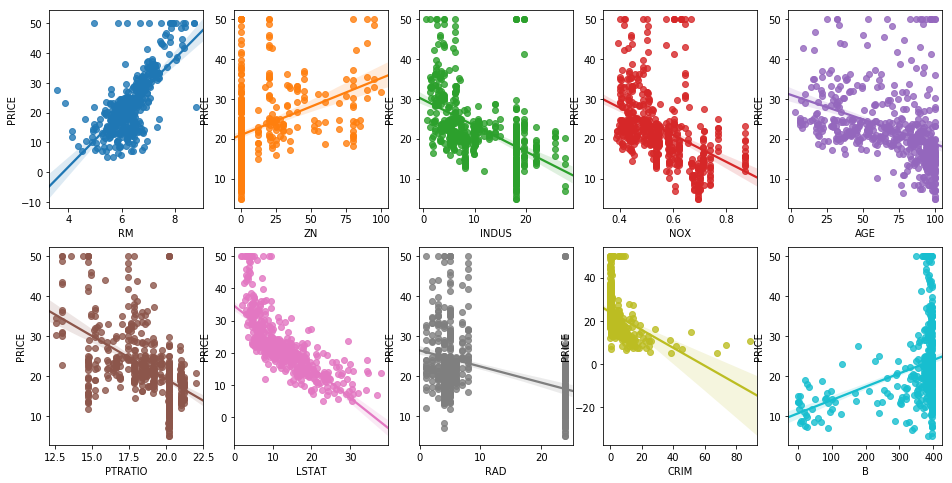

In [12]:
boston_df = add_target_to_data(BOSTON_DATA)
features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD', 'CRIM', 'B']
plotting_graph(boston_df, features, n_row=2, n_col=5)

In [19]:
'''
The correlation coefficient ranges from -1 to 1. 
If the value is close to 1, it means that there is a strong positive correlation between the two variables.
When it is close to -1, the variables have a strong negative correlation.
'''
correlation_matrix = boston_df.corr().round(2)
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


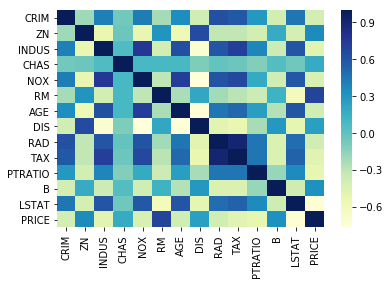

In [26]:
sns.heatmap(correlation_matrix, cmap="YlGnBu")
plt.show()

## Prediction with Linear Regression

In [66]:
X_train, X_test, Y_train, Y_test = split_dataframe(boston_df)

# TODO: Load your machine learning model
model = LinearRegression()
# TODO: Train!
model.fit(X_train, Y_train)
# TODO: make prediction with unseen data!
pred = model.predict(X_test)
expectation = Y_test
# TODO: what is mse between the answer and your prediction?
lr_mse = mean_squared_error(expectation, pred)
# TODO: RMSE
lr_rmse = np.sqrt(mse)

print('LR_MSE: {0:.3f}, LR_RMSE: {1:.3F}'.format(lr_mse, lr_rmse))
# Regression Coefficient
print('Regression Coefficients:', np.round(model.coef_, 1))
# sort from the biggest
coeff = pd.Series(data=model.coef_, index=X_train.columns).sort_values(ascending=False)
print(coeff)

LR_MSE: 21.517, LR_RMSE: 4.695
Regression Coefficients: [ -0.1   0.    0.    3.1 -15.4   4.1  -0.   -1.4   0.2  -0.   -0.9   0.
  -0.5]
RM          4.057199
CHAS        3.119835
RAD         0.242727
INDUS       0.049523
ZN          0.035809
B           0.011794
TAX        -0.008702
AGE        -0.010821
CRIM       -0.133470
LSTAT      -0.547113
PTRATIO    -0.910685
DIS        -1.385998
NOX       -15.417061
dtype: float64


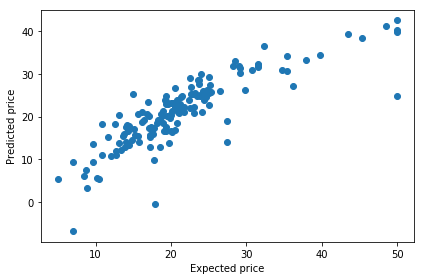

In [67]:
plt.scatter(expectation, pred)
plt.xlabel('Expected price')
plt.ylabel('Predicted price')
plt.tight_layout()

## Prediction with other Regression methods

- **Ridge, Lasso and ElasticNet**
- **Gradient Boosting Regressor**
- **SGD Regressor**
According to sklearn's official documentation,  
"SGDRegressor is well suited for regression problems with a large number of training samples (> 10.000), for other problems we recommend Ridge, Lasso, or ElasticNet."

In [81]:
!pip install xgboost

You should consider upgrading via the 'pip install --upgrade pip' command.


In [83]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [88]:
models = {
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "ElasticNet" : ElasticNet(),
    "Gradient Boosting" : GradientBoostingRegressor(),
    "SGD" : SGDRegressor(max_iter=1000, tol=1e-3), 
    "XGB" : XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
}

pred_record = {}

In [89]:
for name, model in models.items():
    # TODO: Load your machine learning model
    curr_model = model
    # TODO: Train!
    curr_model.fit(X_train, Y_train)
    # TODO: make prediction with unseen data!
    pred = curr_model.predict(X_test)
    expectation = Y_test
    # TODO: what is mse between the answer and your prediction?
    mse = mean_squared_error(expectation, pred)
    # TODO: RMSE
    rmse = np.sqrt(mse)

    print('{} MSE: {}, {} RMSE: {}'.format(name, mse, name, rmse))
    
    pred_record.update({name : pred})

Ridge MSE: 22.044053089861013, Ridge RMSE: 4.695109486461526
Lasso MSE: 25.639502928043992, Lasso RMSE: 5.063546477326341
ElasticNet MSE: 25.40519636428209, ElasticNet RMSE: 5.040356769543411
Gradient Boosting MSE: 7.9139534587177245, Gradient Boosting RMSE: 2.8131749783327957
SGD MSE: 9.198712940670976e+28, SGD RMSE: 303293800475231.9
[19:44:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB MSE: 82.71679422016705, XGB RMSE: 9.094877361469315


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


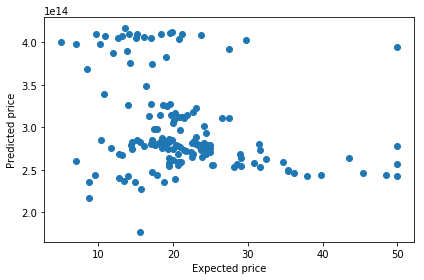

In [91]:
prediction = pred_record["SGD"]

plt.scatter(expectation, prediction)
plt.xlabel('Expected price')
plt.ylabel('Predicted price')
plt.tight_layout()

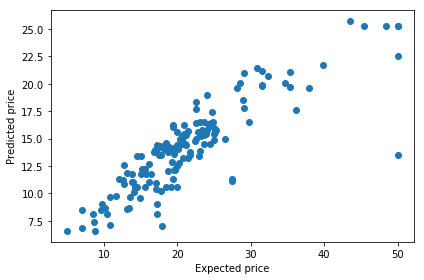

In [93]:
prediction = pred_record["XGB"]

plt.scatter(expectation, prediction)
plt.xlabel('Expected price')
plt.ylabel('Predicted price')
plt.tight_layout()

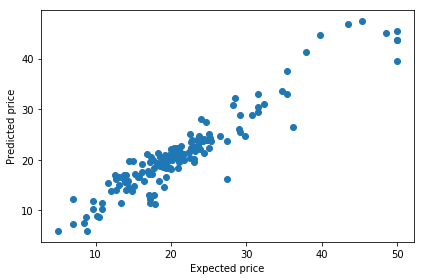

In [92]:
prediction = pred_record["Gradient Boosting"]

plt.scatter(expectation, prediction)
plt.xlabel('Expected price')
plt.ylabel('Predicted price')
plt.tight_layout()